<a href="https://colab.research.google.com/github/Mintu-Vipin/Semester3/blob/master/MintuVipinJoy_COMP257_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 3**

**1. Retrieve and load the Olivetti** **faces dataset** 

In [1]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces() 
print(olivetti.keys())


dict_keys(['data', 'images', 'target', 'DESCR'])


In [2]:
import matplotlib.pyplot as plt

# funtion for plotting important elements
def plotting_fig(s):
    fig=plt.figure(figsize=(10,10))
    for i in range(100):
        ax=fig.add_subplot(10,10,i+1)
        ax.imshow(s[i], plt.get_cmap('copper'))
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

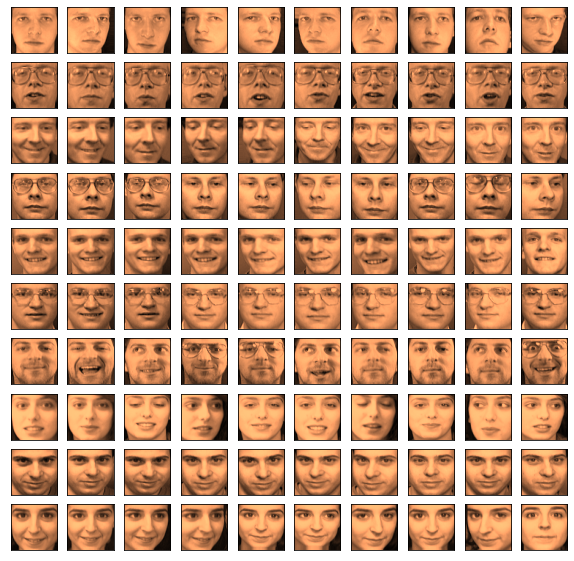

In [3]:
plotting_fig(olivetti.images)    # plotting original dataset

In [4]:
# X and y data
olivetti_X, olivetti_y = olivetti.data, olivetti.target


print(olivetti_X.shape, olivetti_y.shape)
# print(olivetti)
# print(olivetti_X)
# print(olivetti_y)

(400, 4096) (400,)


**2. Split the training set, a validation set, and a test set using stratified sampling to ensure that there are the same number of images per person in each set.**

In [5]:
from sklearn.model_selection import train_test_split
from collections import Counter

# split into train test sets
olivetti_X_train, olivetti_X_test, olivetti_y_train, olivetti_y_test = train_test_split(olivetti_X, olivetti_y, test_size=0.20, random_state=1, stratify=olivetti_y)

print(olivetti_X_train.shape, olivetti_X_test.shape, olivetti_y_train.shape, olivetti_y_test.shape)
print(Counter(olivetti_y_train))
print(Counter(olivetti_y_test))


# split into train val sets
olivetti_X_train, olivetti_X_val, olivetti_y_train, olivetti_y_val = train_test_split(olivetti_X_train, olivetti_y_train, test_size=0.25, random_state=1, stratify=olivetti_y_train)

print('\n\n')
print(olivetti_X_train.shape, olivetti_X_val.shape, olivetti_y_train.shape, olivetti_y_val.shape)
print(Counter(olivetti_y_train))
print(Counter(olivetti_y_val))

(320, 4096) (80, 4096) (320,) (80,)
Counter({17: 8, 26: 8, 16: 8, 10: 8, 37: 8, 24: 8, 1: 8, 28: 8, 8: 8, 7: 8, 19: 8, 32: 8, 35: 8, 4: 8, 34: 8, 39: 8, 2: 8, 15: 8, 14: 8, 21: 8, 20: 8, 6: 8, 23: 8, 5: 8, 13: 8, 27: 8, 9: 8, 11: 8, 3: 8, 22: 8, 29: 8, 31: 8, 18: 8, 30: 8, 38: 8, 36: 8, 0: 8, 25: 8, 12: 8, 33: 8})
Counter({18: 2, 23: 2, 39: 2, 6: 2, 38: 2, 28: 2, 19: 2, 22: 2, 4: 2, 24: 2, 37: 2, 7: 2, 34: 2, 32: 2, 8: 2, 31: 2, 25: 2, 27: 2, 29: 2, 5: 2, 2: 2, 26: 2, 11: 2, 33: 2, 35: 2, 13: 2, 10: 2, 30: 2, 36: 2, 15: 2, 17: 2, 9: 2, 1: 2, 14: 2, 3: 2, 0: 2, 16: 2, 20: 2, 12: 2, 21: 2})



(240, 4096) (80, 4096) (240,) (80,)
Counter({26: 6, 9: 6, 5: 6, 38: 6, 20: 6, 33: 6, 22: 6, 11: 6, 21: 6, 29: 6, 28: 6, 3: 6, 24: 6, 27: 6, 2: 6, 7: 6, 34: 6, 15: 6, 37: 6, 19: 6, 0: 6, 12: 6, 30: 6, 4: 6, 18: 6, 13: 6, 35: 6, 10: 6, 32: 6, 25: 6, 36: 6, 1: 6, 16: 6, 23: 6, 39: 6, 31: 6, 14: 6, 17: 6, 8: 6, 6: 6})
Counter({7: 2, 0: 2, 33: 2, 34: 2, 10: 2, 1: 2, 27: 2, 28: 2, 15: 2, 5: 2, 32: 2, 22:

**3. Using k-fold cross validation, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set**

In [6]:
# evaluate a logistic regression model using k-fold cross-validation

# prepare the cross-validation procedure
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Logistic Regresssion
from sklearn.linear_model import LogisticRegression

# Fit the model
Logistic_Model = LogisticRegression(random_state=0, C = 0.2, solver='saga', max_iter=100).fit(olivetti_X_train, olivetti_y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [7]:
#----------Test set------------

# prediction
pred=Logistic_Model.predict(olivetti_X_test)

# Accuracy Score
score = Logistic_Model.score(olivetti_X_test, olivetti_y_test)
print('Test Accuracy Score', score)

# evaluate model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Logistic_Model, olivetti_X_test, olivetti_y_test, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
from numpy import mean
from numpy import std

# print(scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Test Accuracy Score 0.9375
Accuracy: 0.200 (0.150)


In [8]:
# plotting the predicted values along with true values
def plot_gallery(images,titles,h,w,row=6,col=11):
    plt.figure(figsize=(1.4*col,2*row))
    plt.subplots_adjust(bottom=0,left=0.1,right=.99,top=0.80,hspace=.35)
    for i in range(66):
        plt.subplot(row,col,i+1)
        plt.imshow(images[i].reshape((64,64)),cmap=plt.cm.bone)
        plt.title(titles[i],size=12)
        plt.xticks([])
        plt.yticks([])
def title(pred,olivetti_y_test,i):
    return 'predicted: %s\n true: %s'%(pred[i],olivetti_y_test[i])

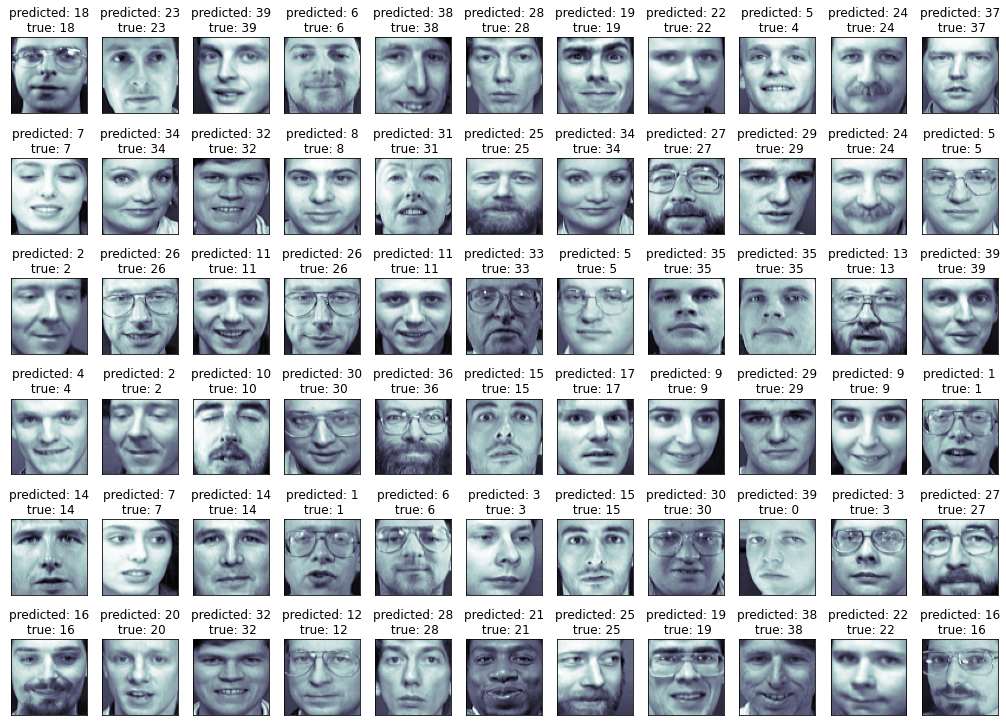

In [9]:
# showing comparison of actual values with predicted ones
prediction = [title(pred,olivetti_y_test,i) for i in range(pred.shape[0])]
plot_gallery(olivetti_X_test,prediction,64,64)

In [10]:
#----------------Validation set-------------

# prediction
pred1=Logistic_Model.predict(olivetti_X_val)

# Accuracy Score
score1 = Logistic_Model.score(olivetti_X_val, olivetti_y_val)
print('Val Accuracy Score', score1)

# evaluate model(val data)
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(Logistic_Model, olivetti_X_val, olivetti_y_val, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
from numpy import mean
from numpy import std

# print(scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores1), std(scores1)))

Val Accuracy Score 0.925
Accuracy: 0.287 (0.138)


In [11]:
# showing comparison of actual values with predicted ones
prediction1 = [title(pred1,olivetti_y_val,i) for i in range(pred1.shape[0])]
plot_gallery(olivetti_X_val,prediction1,64,64)

**4. Using either Agglomerative Hierarchical Clustering (AHC) or Divisive Hierarchical Clustering (DHC) and using the centroid-based clustering rule, reduce the dimensionality of the set by using the following similarity measures:**

In [12]:
# # Scale the data and normalize
# from sklearn.preprocessing import StandardScaler, normalize

# sc = StandardScaler()
# olivetti_X_train = sc.fit_transform(olivetti_X_train)
# olivetti_X_train = normalize(olivetti_X_train)

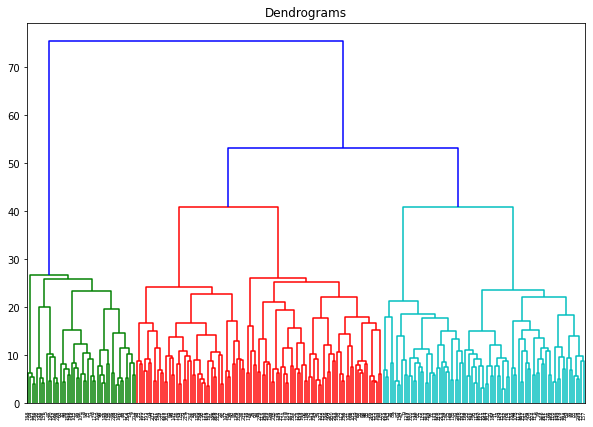

In [13]:
# draw the dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(olivetti_X_train, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. If we draw a horizontal line that passes through longest distance without a horizontal line, we get 5 clusters as shown in the following figure:

In [14]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(olivetti_X_train, method='ward'))
plt.axhline(y=30, color='r', linestyle='--')

We have 5 clusters as this line cuts the dendrogram at 5 points. Let’s now apply hierarchical clustering for 5 clusters:

**a) Euclidean Distance**

In [15]:
from sklearn.cluster import AgglomerativeClustering
cluster_euclidean = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
y_euclidean = cluster_euclidean.fit_predict(olivetti_X_train)

plt.figure(figsize=(10, 7))
plt.scatter(olivetti_X_train[:,0], olivetti_X_train[:,1], c=cluster_euclidean.labels_)

In [16]:
cluster_euclidean.labels_

array([1, 2, 0, 3, 3, 3, 0, 1, 3, 0, 3, 3, 3, 0, 1, 1, 1, 0, 2, 3, 0, 1,
       3, 2, 2, 0, 3, 1, 2, 0, 0, 0, 1, 4, 0, 3, 3, 3, 1, 4, 1, 2, 0, 0,
       0, 3, 0, 0, 1, 3, 3, 0, 3, 3, 4, 3, 1, 0, 0, 1, 3, 1, 0, 3, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 3, 0, 1, 1, 4, 0, 1, 0, 0, 3, 4, 1, 0, 0, 0,
       0, 4, 3, 3, 1, 2, 2, 0, 1, 1, 1, 3, 3, 3, 0, 3, 4, 0, 0, 0, 0, 3,
       4, 4, 1, 0, 0, 1, 1, 4, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 3, 1, 4,
       4, 0, 1, 1, 3, 0, 0, 0, 4, 0, 1, 0, 1, 0, 4, 1, 3, 1, 0, 3, 0, 0,
       0, 0, 1, 4, 3, 1, 2, 4, 0, 0, 1, 0, 3, 1, 0, 4, 0, 1, 3, 2, 4, 3,
       1, 1, 1, 1, 1, 4, 0, 0, 1, 0, 0, 0, 1, 3, 3, 0, 1, 3, 1, 3, 3, 1,
       3, 0, 0, 1, 1, 0, 3, 4, 0, 1, 1, 0, 4, 0, 0, 0, 3, 0, 0, 0, 3, 1,
       0, 0, 1, 3, 4, 0, 1, 1, 3, 1, 1, 0, 4, 0, 0, 1, 1, 1, 1, 1])

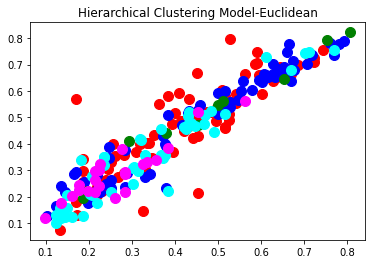

In [17]:
# Hierarchical Clustering Model-Euclidean
plt.scatter(olivetti_X_train[y_euclidean==0, 0], olivetti_X_train[y_euclidean==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(olivetti_X_train[y_euclidean==1, 0], olivetti_X_train[y_euclidean==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(olivetti_X_train[y_euclidean==2, 0], olivetti_X_train[y_euclidean==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(olivetti_X_train[y_euclidean==3, 0], olivetti_X_train[y_euclidean==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(olivetti_X_train[y_euclidean==4, 0], olivetti_X_train[y_euclidean==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.title('Hierarchical Clustering Model-Euclidean')
plt.xlabel('')
plt.ylabel('')
plt.show()

**b) Minkowski Distance**

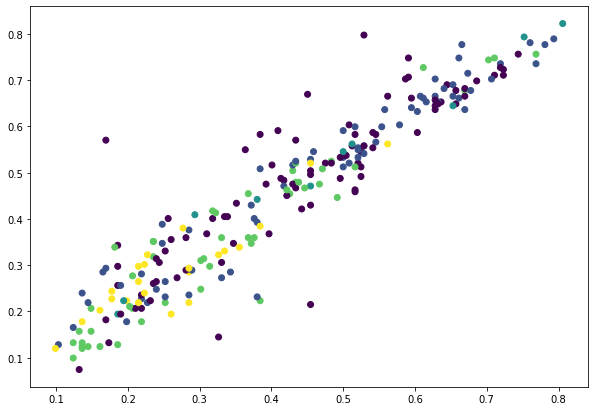

In [18]:
cluster_minkowski = AgglomerativeClustering(n_clusters=5, affinity='minkowski', linkage='complete')
y_minkowski = cluster_minkowski.fit_predict(olivetti_X_train)

plt.figure(figsize=(10, 7))
plt.scatter(olivetti_X_train[:,0], olivetti_X_train[:,1], c=cluster_minkowski.labels_)

In [19]:
cluster_minkowski.labels_

array([1, 2, 0, 3, 3, 3, 0, 1, 3, 0, 3, 3, 3, 0, 1, 1, 1, 0, 2, 3, 0, 1,
       3, 2, 2, 0, 3, 1, 2, 0, 0, 0, 1, 4, 0, 3, 3, 3, 1, 4, 1, 2, 0, 0,
       0, 3, 0, 0, 1, 3, 3, 0, 3, 3, 4, 3, 1, 0, 0, 1, 3, 1, 0, 3, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 3, 0, 1, 1, 4, 0, 1, 0, 0, 3, 4, 1, 0, 0, 0,
       0, 4, 3, 3, 1, 2, 2, 0, 1, 1, 1, 3, 3, 3, 0, 3, 4, 0, 0, 0, 0, 3,
       4, 4, 1, 0, 0, 1, 1, 4, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 3, 1, 4,
       4, 0, 1, 1, 3, 0, 0, 0, 4, 0, 1, 0, 1, 0, 4, 1, 3, 1, 0, 3, 0, 0,
       0, 0, 1, 4, 3, 1, 2, 4, 0, 0, 1, 0, 3, 1, 0, 4, 0, 1, 3, 2, 4, 3,
       1, 1, 1, 1, 1, 4, 0, 0, 1, 0, 0, 0, 1, 3, 3, 0, 1, 3, 1, 3, 3, 1,
       3, 0, 0, 1, 1, 0, 3, 4, 0, 1, 1, 0, 4, 0, 0, 0, 3, 0, 0, 0, 3, 1,
       0, 0, 1, 3, 4, 0, 1, 1, 3, 1, 1, 0, 4, 0, 0, 1, 1, 1, 1, 1])

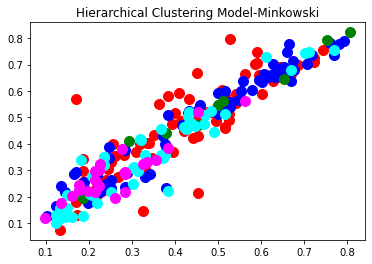

In [20]:
# Hierarchical Clustering Model-Minkowski
plt.scatter(olivetti_X_train[y_minkowski==0, 0], olivetti_X_train[y_minkowski==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(olivetti_X_train[y_minkowski==1, 0], olivetti_X_train[y_minkowski==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(olivetti_X_train[y_minkowski==2, 0], olivetti_X_train[y_minkowski==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(olivetti_X_train[y_minkowski==3, 0], olivetti_X_train[y_minkowski==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(olivetti_X_train[y_minkowski==4, 0], olivetti_X_train[y_minkowski==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.title('Hierarchical Clustering Model-Minkowski')
plt.xlabel('')
plt.ylabel('')
plt.show()

**c) Cosine Similarity**

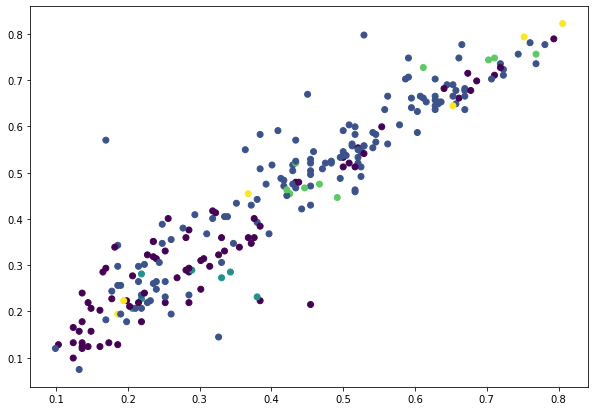

In [21]:
cluster_cosine = AgglomerativeClustering(n_clusters=5, affinity='cosine', linkage='complete')
y_cosine = cluster_cosine.fit_predict(olivetti_X_train)

plt.figure(figsize=(10, 7))
plt.scatter(olivetti_X_train[:,0], olivetti_X_train[:,1], c=cluster_cosine.labels_)

In [22]:
cluster_cosine.labels_

array([1, 1, 0, 0, 1, 3, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 4, 0, 1, 0,
       1, 1, 4, 0, 3, 0, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 0, 2, 4, 1, 1,
       0, 3, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 2, 1, 1, 1,
       1, 1, 0, 3, 0, 4, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 3, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 4, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 4, 3, 1, 1, 3, 1, 3, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 3, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 2])

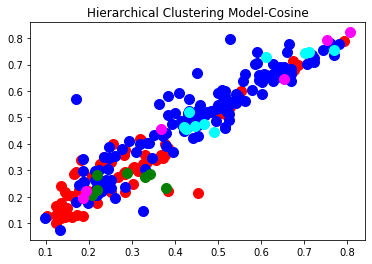

In [23]:
# Hierarchical Clustering Model-Cosine
plt.scatter(olivetti_X_train[y_cosine==0, 0], olivetti_X_train[y_cosine==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(olivetti_X_train[y_cosine==1, 0], olivetti_X_train[y_cosine==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(olivetti_X_train[y_cosine==2, 0], olivetti_X_train[y_cosine==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(olivetti_X_train[y_cosine==3, 0], olivetti_X_train[y_cosine==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(olivetti_X_train[y_cosine==4, 0], olivetti_X_train[y_cosine==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.title('Hierarchical Clustering Model-Cosine')
plt.xlabel('')
plt.ylabel('')
plt.show()

**5. Silhouette score approach to choose the number of clusters for a) Euclidean Distance b) Minkowski Distance c) Cosine Similarity**

Silhouette score approach to choose the number of clusters for a) Euclidean Distance

For n_clusters = 2 The average silhouette_score is : 0.09126851
For n_clusters = 3 The average silhouette_score is : 0.09126851
For n_clusters = 4 The average silhouette_score is : 0.09126851
For n_clusters = 5 The average silhouette_score is : 0.09126851
For n_clusters = 6 The average silhouette_score is : 0.09126851


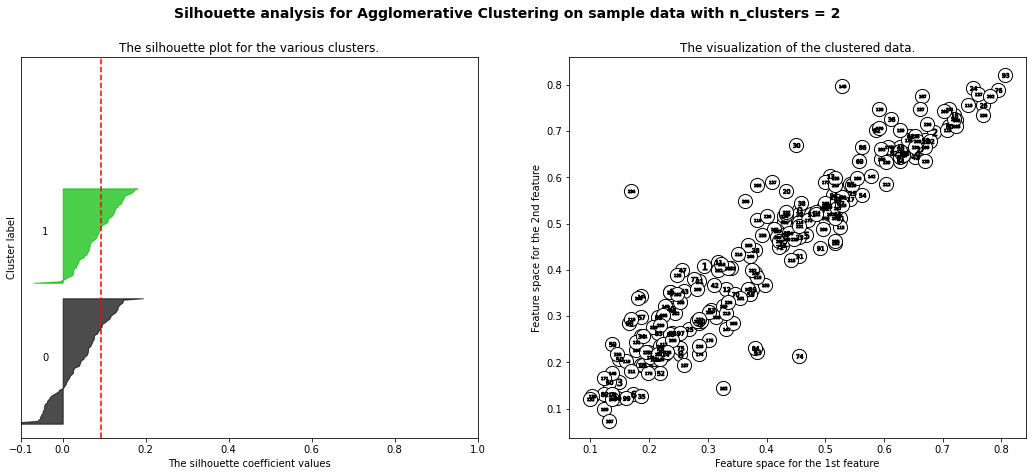

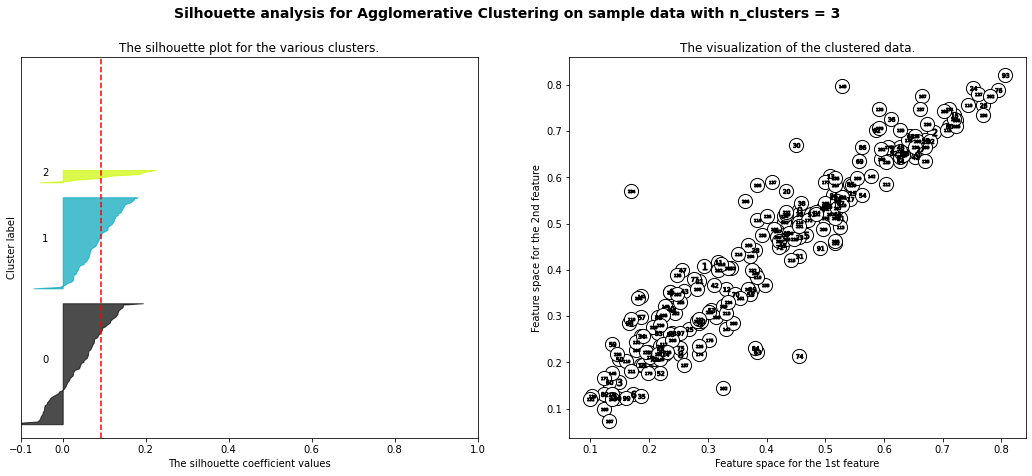

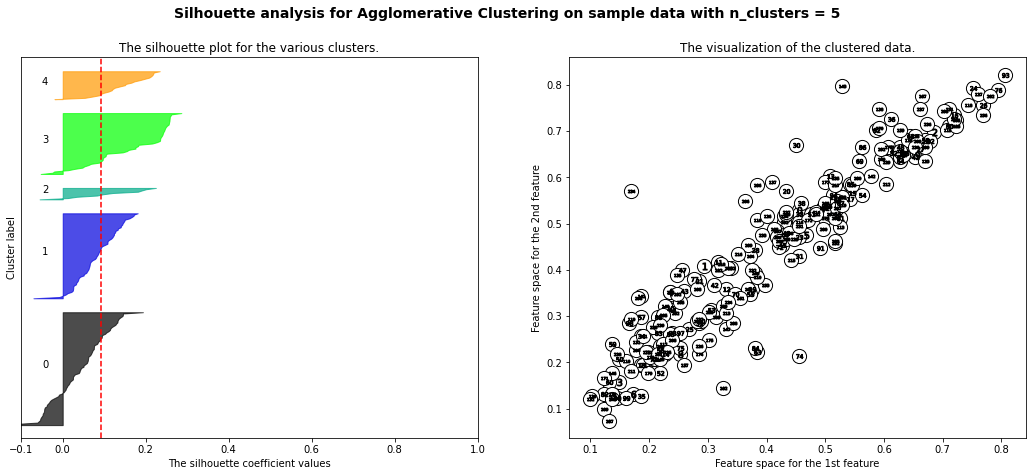

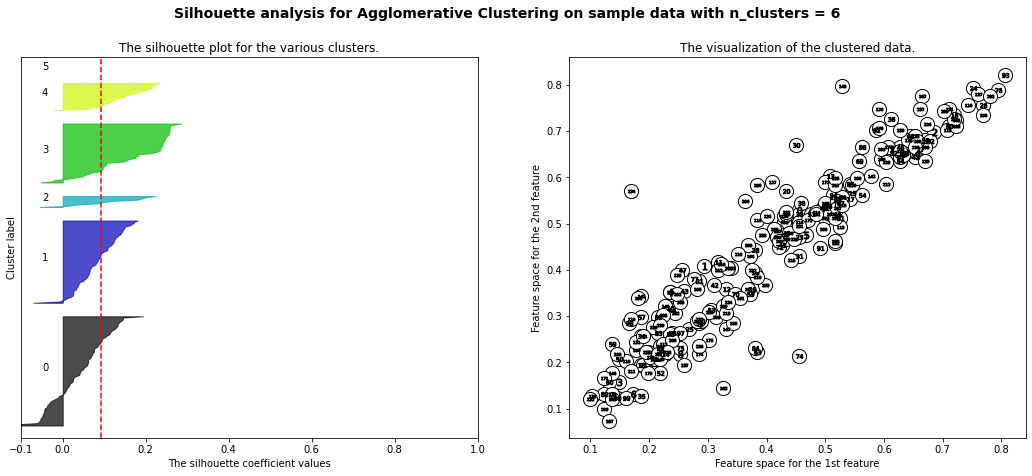

In [24]:
#Dimentionality reductio using AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(olivetti_X_train) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value
    
    cluster_euclidean = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
    cluster_labels = cluster_euclidean.fit_predict(olivetti_X_train)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(olivetti_X_train, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(olivetti_X_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(olivetti_X_train[:, 0], olivetti_X_train[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Draw white circles at cluster centers
    ax2.scatter(olivetti_X_train[:, 0], olivetti_X_train[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(olivetti_X_train):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for Agglomerative Clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Silhouette score approach to choose the number of clusters for b) Minkowski Distance

For n_clusters = 2 The average silhouette_score is : 0.09126851
For n_clusters = 3 The average silhouette_score is : 0.09126851
For n_clusters = 4 The average silhouette_score is : 0.09126851
For n_clusters = 5 The average silhouette_score is : 0.09126851
For n_clusters = 6 The average silhouette_score is : 0.09126851


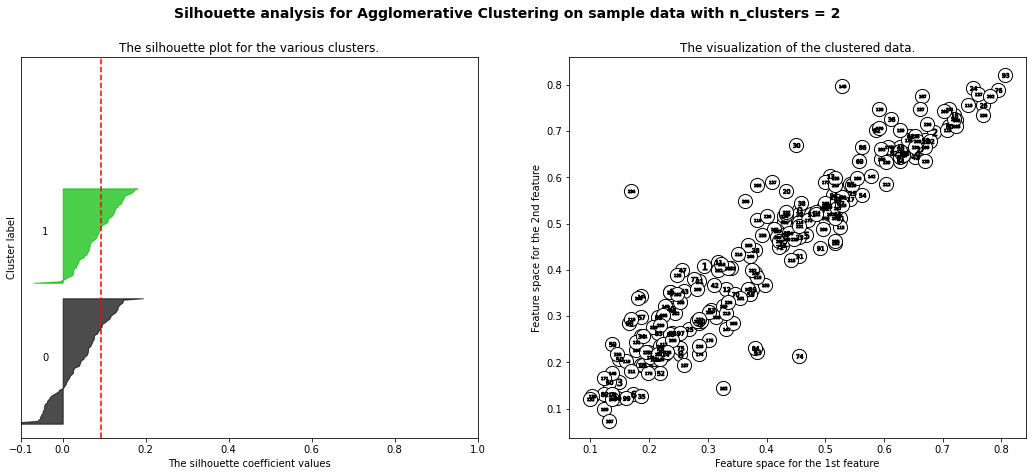

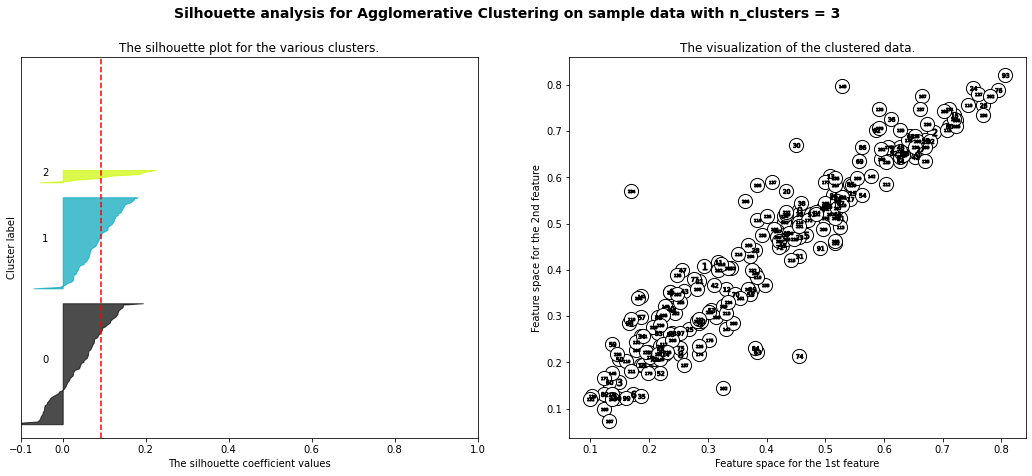

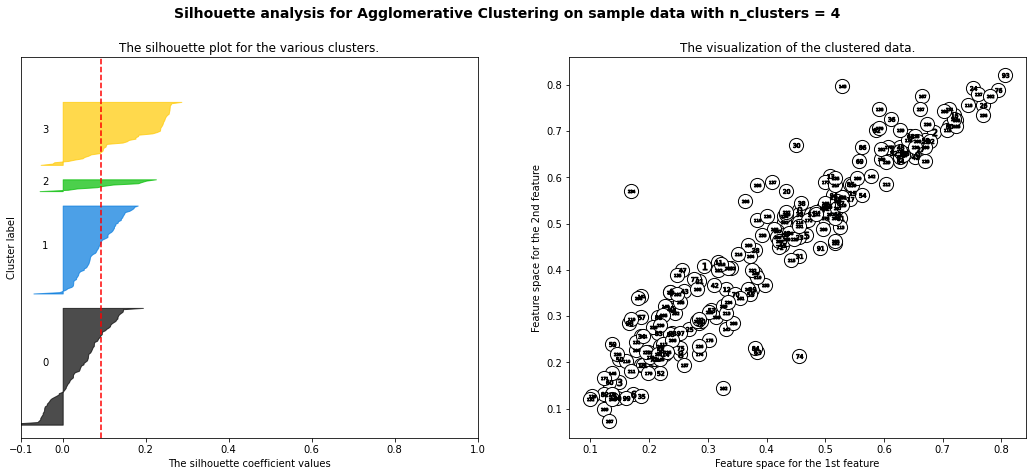

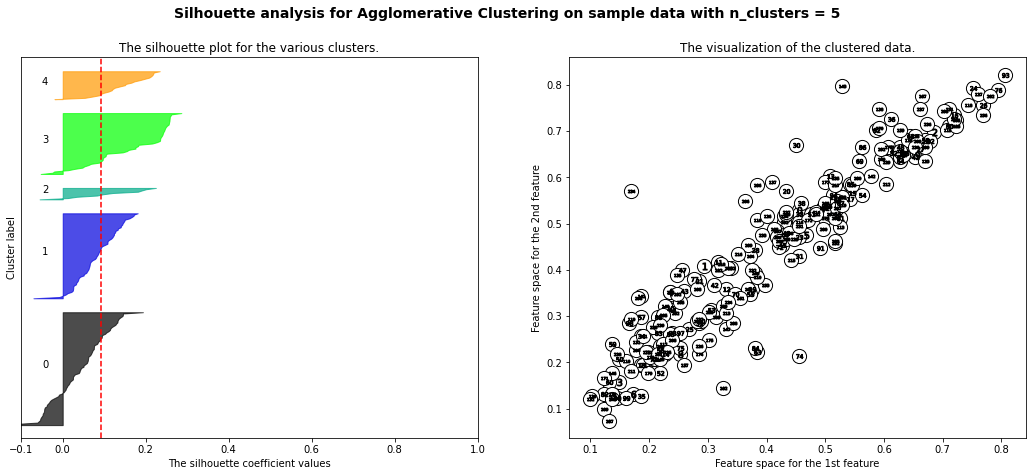

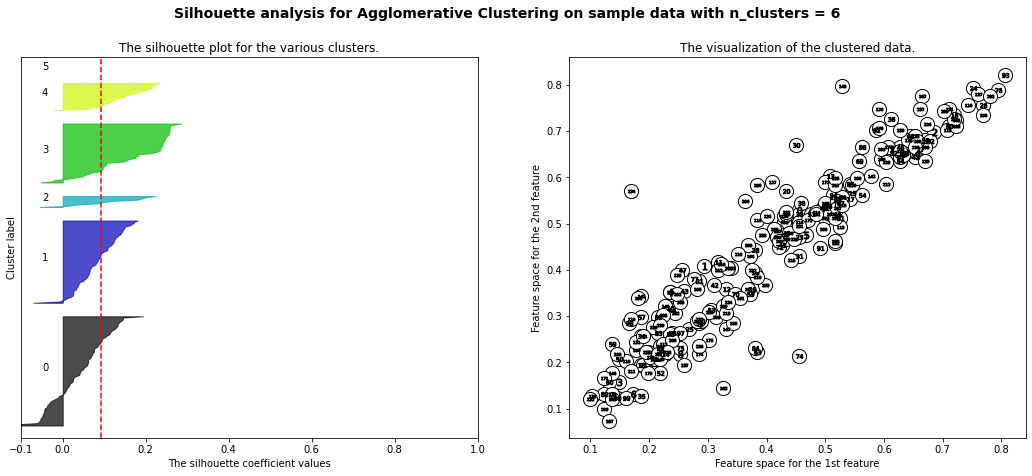

In [25]:
#Dimentionality reductio using AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(olivetti_X_train) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value
    
    cluster_minkowski= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
    cluster_labels = cluster_minkowski.fit_predict(olivetti_X_train)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(olivetti_X_train, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(olivetti_X_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(olivetti_X_train[:, 0], olivetti_X_train[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Draw white circles at cluster centers
    ax2.scatter(olivetti_X_train[:, 0], olivetti_X_train[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(olivetti_X_train):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for Agglomerative Clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Silhouette score approach to choose the number of clusters for c) Cosine Similarity

For n_clusters = 2 The average silhouette_score is : 0.09126851
For n_clusters = 3 The average silhouette_score is : 0.09126851
For n_clusters = 4 The average silhouette_score is : 0.09126851
For n_clusters = 5 The average silhouette_score is : 0.09126851
For n_clusters = 6 The average silhouette_score is : 0.09126851


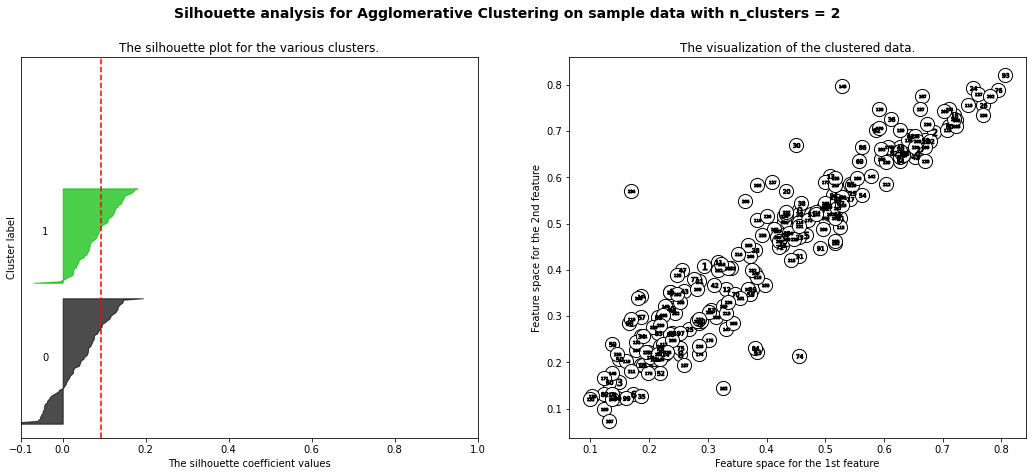

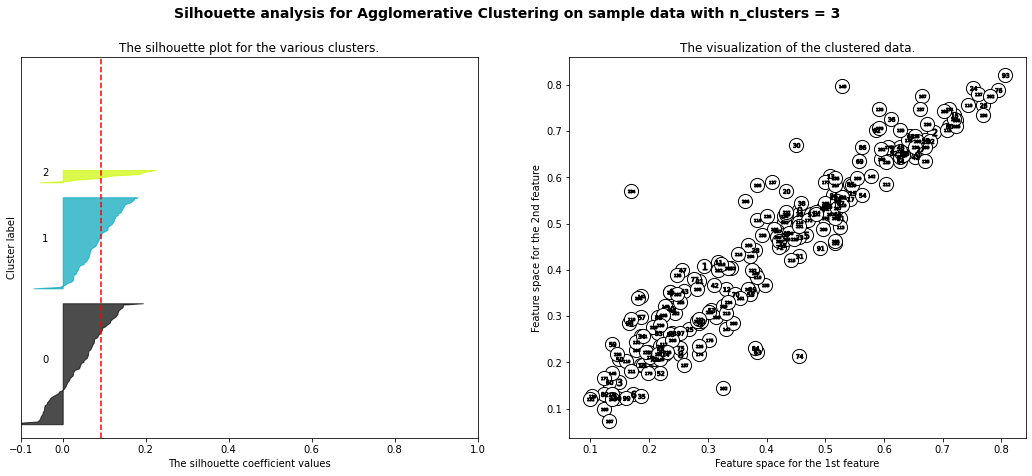

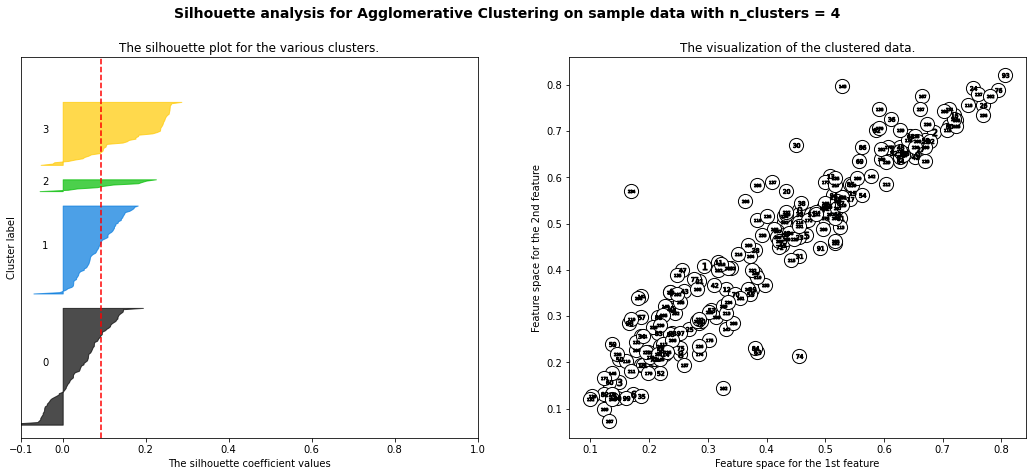

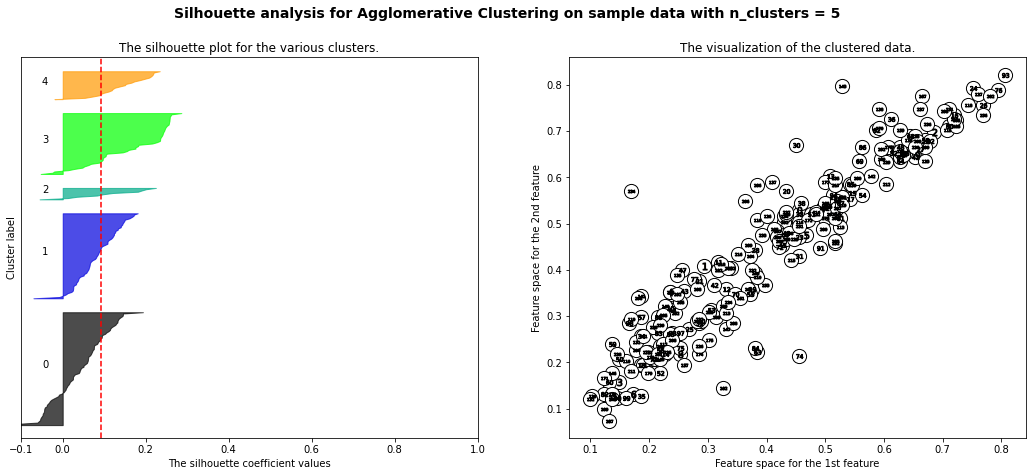

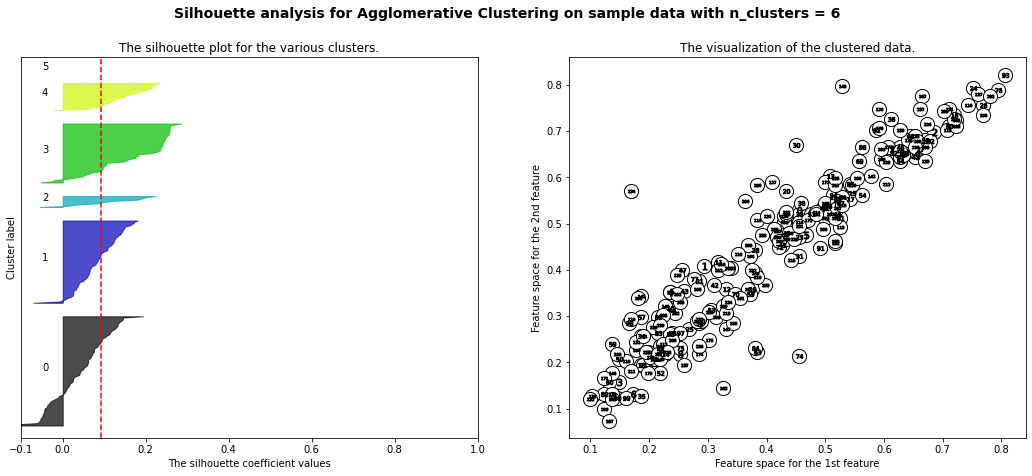

In [26]:
#Dimentionality reductio using AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(olivetti_X_train) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value
    
    cluster_cosine= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
    cluster_labels = cluster_cosine.fit_predict(olivetti_X_train)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(olivetti_X_train, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(olivetti_X_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(olivetti_X_train[:, 0], olivetti_X_train[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Draw white circles at cluster centers
    ax2.scatter(olivetti_X_train[:, 0], olivetti_X_train[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(olivetti_X_train):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for Agglomerative Clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**6. Use the set from (4(a), 4(b), or 4(c)) to train a classifier as in (3) using k-fold cross validation**

Using Set from 4a)

In [27]:
# evaluate a logistic regression model using k-fold cross-validation

# prepare the cross-validation procedure
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Logistic Regresssion
from sklearn.linear_model import LogisticRegression

# Fit the model
Logistic_Model1 = LogisticRegression(random_state=0, C = 0.2, solver='saga', max_iter=100).fit(olivetti_X_train, y_euclidean)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [28]:
#----------Test set------------

# prediction
pred=Logistic_Model1.predict(olivetti_X_test)

# Accuracy Score
score = Logistic_Model1.score(olivetti_X_test, olivetti_y_test)
print('Test Accuracy Score', score)

# evaluate model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Logistic_Model1, olivetti_X_test, olivetti_y_test, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
from numpy import mean
from numpy import std

# print(scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Test Accuracy Score 0.0125
Accuracy: 0.200 (0.150)


In [29]:
# plotting the predicted values along with true values
def plot_gallery(images,titles,h,w,row=6,col=11):
    plt.figure(figsize=(1.4*col,2*row))
    plt.subplots_adjust(bottom=0,left=0.1,right=.99,top=0.80,hspace=.35)
    for i in range(66):
        plt.subplot(row,col,i+1)
        plt.imshow(images[i].reshape((64,64)),cmap=plt.cm.bone)
        plt.title(titles[i],size=12)
        plt.xticks([])
        plt.yticks([])
def title(pred,olivetti_y_test,i):
    return 'predicted: %s\n true: %s'%(pred[i],olivetti_y_test[i])

In [30]:
# showing comparison of actual values with predicted ones
prediction = [title(pred,olivetti_y_test,i) for i in range(pred.shape[0])]
plot_gallery(olivetti_X_test,prediction,64,64)

Using Set from 4b)

In [31]:
# evaluate a logistic regression model using k-fold cross-validation

# prepare the cross-validation procedure
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Logistic Regresssion
from sklearn.linear_model import LogisticRegression

# Fit the model
Logistic_Model2 = LogisticRegression(random_state=0, C = 0.2, solver='saga', max_iter=100).fit(olivetti_X_train, y_minkowski)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [32]:
#----------Test set------------

# prediction
pred=Logistic_Model2.predict(olivetti_X_test)

# Accuracy Score
score = Logistic_Model2.score(olivetti_X_test, olivetti_y_test)
print('Test Accuracy Score', score)

# evaluate model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Logistic_Model2, olivetti_X_test, olivetti_y_test, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
from numpy import mean
from numpy import std

# print(scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Test Accuracy Score 0.0125
Accuracy: 0.200 (0.150)


In [33]:
# plotting the predicted values along with true values
def plot_gallery(images,titles,h,w,row=6,col=11):
    plt.figure(figsize=(1.4*col,2*row))
    plt.subplots_adjust(bottom=0,left=0.1,right=.99,top=0.80,hspace=.35)
    for i in range(66):
        plt.subplot(row,col,i+1)
        plt.imshow(images[i].reshape((64,64)),cmap=plt.cm.bone)
        plt.title(titles[i],size=12)
        plt.xticks([])
        plt.yticks([])
def title(pred,olivetti_y_test,i):
    return 'predicted: %s\n true: %s'%(pred[i],olivetti_y_test[i])

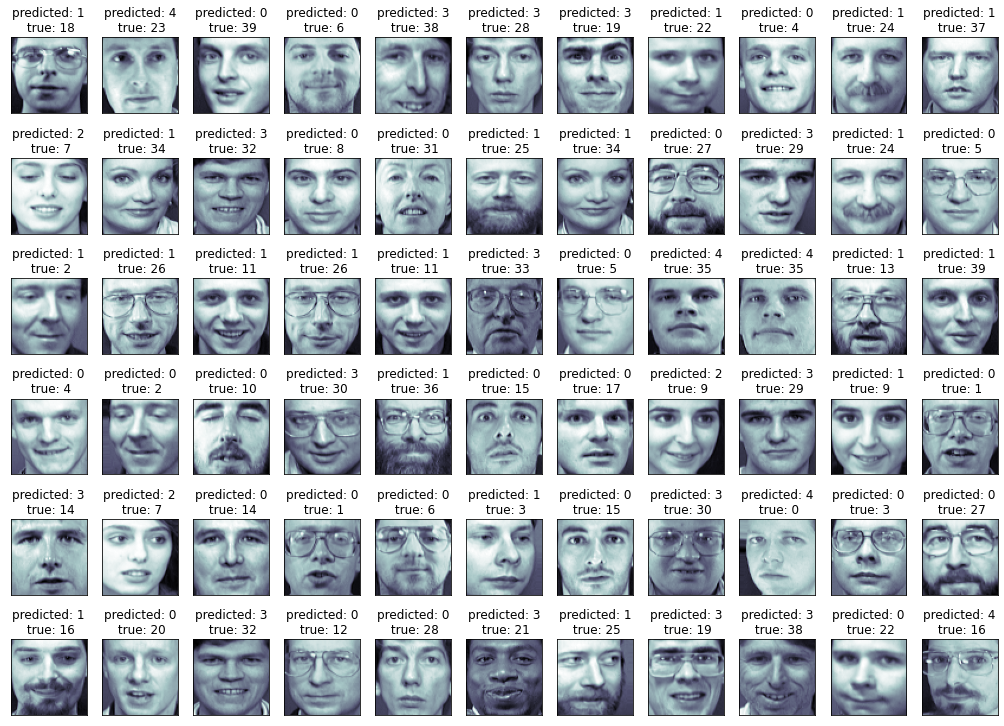

In [34]:
# showing comparison of actual values with predicted ones
prediction = [title(pred,olivetti_y_test,i) for i in range(pred.shape[0])]
plot_gallery(olivetti_X_test,prediction,64,64)

Using Set from 4c)

In [35]:
# evaluate a logistic regression model using k-fold cross-validation

# prepare the cross-validation procedure
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Logistic Regresssion
from sklearn.linear_model import LogisticRegression

# Fit the model
Logistic_Model3 = LogisticRegression(random_state=0, C = 0.2, solver='saga', max_iter=100).fit(olivetti_X_train, y_cosine)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [36]:
#----------Test set------------

# prediction
pred=Logistic_Model3.predict(olivetti_X_test)

# Accuracy Score
score = Logistic_Model3.score(olivetti_X_test, olivetti_y_test)
print('Test Accuracy Score', score)

# evaluate model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Logistic_Model3, olivetti_X_test, olivetti_y_test, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
from numpy import mean
from numpy import std

# print(scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Test Accuracy Score 0.025
Accuracy: 0.200 (0.150)


In [37]:
# plotting the predicted values along with true values
def plot_gallery(images,titles,h,w,row=6,col=11):
    plt.figure(figsize=(1.4*col,2*row))
    plt.subplots_adjust(bottom=0,left=0.1,right=.99,top=0.80,hspace=.35)
    for i in range(66):
        plt.subplot(row,col,i+1)
        plt.imshow(images[i].reshape((64,64)),cmap=plt.cm.bone)
        plt.title(titles[i],size=12)
        plt.xticks([])
        plt.yticks([])
def title(pred,olivetti_y_test,i):
    return 'predicted: %s\n true: %s'%(pred[i],olivetti_y_test[i])

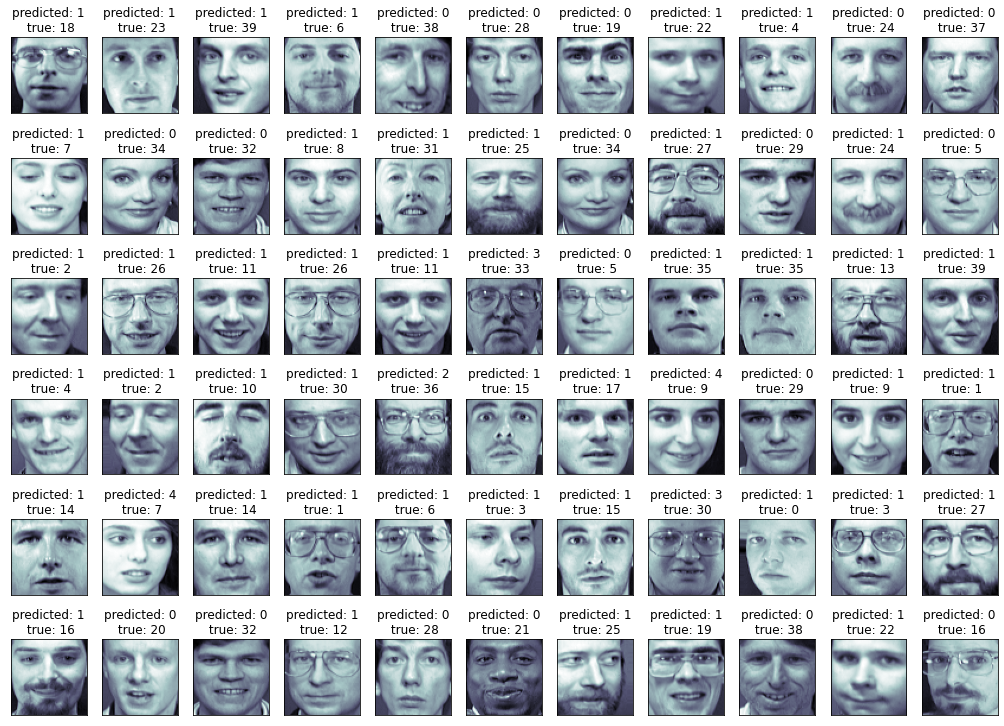

In [38]:
# showing comparison of actual values with predicted ones
prediction = [title(pred,olivetti_y_test,i) for i in range(pred.shape[0])]
plot_gallery(olivetti_X_test,prediction,64,64)